# Zomato Bangalore Dataset
- Zomato is an Indian multinational restaurant aggregator and food delivery company founded by Deepinder Goyal and Pankaj Chaddah in 2008. Zomato provides information, menus and user-reviews of restaurants as well as food delivery options from partner restaurants in select cities. As of 2019, the service is available in 24 countries and in more than 10,000 cities
- Dataset source: https://www.kaggle.com/datasets/absin7/zomato-bangalore-dataset

# Import libraries and dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
df = pd.read_csv(r'Data/zomato.csv')

# Exploratory Data Analysis

In [3]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [4]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [5]:
df.dtypes

url                            object
address                        object
name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
phone                          object
location                       object
rest_type                      object
dish_liked                     object
cuisines                       object
approx_cost(for two people)    object
reviews_list                   object
menu_item                      object
listed_in(type)                object
listed_in(city)                object
dtype: object

In [6]:
df.shape

(51717, 17)

In [7]:
df.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [8]:
feature_na = [feature for feature in df.columns if df[feature].isnull().sum() > 0]
feature_na

['rate',
 'phone',
 'location',
 'rest_type',
 'dish_liked',
 'cuisines',
 'approx_cost(for two people)']

In [9]:
for feature in feature_na:
    print('{} has {} missing values'. format(feature,np.round(df[feature].isnull().sum() / len(df) * 100, 4 )))

rate has 15.0337 missing values
phone has 2.3358 missing values
location has 0.0406 missing values
rest_type has 0.4389 missing values
dish_liked has 54.2916 missing values
cuisines has 0.087 missing values
approx_cost(for two people) has 0.669 missing values


In [10]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [11]:
df.dropna(axis = 'index', subset=['rate'], inplace = True)

In [12]:
df.shape

(43942, 17)

In [13]:
def split(x):
    return x.split('/')[0]

In [14]:
df['rate'] = df['rate'].apply(split)

In [15]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [16]:
df['rate'].unique()

array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
       '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', 'NEW', '2.9', '3.5',
       '2.6', '3.8 ', '3.4', '4.5', '2.5', '2.7', '4.7', '2.4', '2.2',
       '2.3', '3.4 ', '-', '3.6 ', '4.8', '3.9 ', '4.2 ', '4.0 ', '4.1 ',
       '3.7 ', '3.1 ', '2.9 ', '3.3 ', '2.8 ', '3.5 ', '2.7 ', '2.5 ',
       '3.2 ', '2.6 ', '4.5 ', '4.3 ', '4.4 ', '4.9', '2.1', '2.0', '1.8',
       '4.6 ', '4.9 ', '3.0 ', '4.8 ', '2.3 ', '4.7 ', '2.4 ', '2.1 ',
       '2.2 ', '2.0 ', '1.8 '], dtype=object)

In [17]:
df.replace('NEW', 0, inplace = True)

In [18]:
df.replace('-', 0, inplace = True)

In [19]:
df['rate'].dtype

dtype('O')

In [20]:
df['rate'] = df['rate'].astype(float)

In [21]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


# Analysis of restaurants
### Average rating 

In [22]:
df_rate = df.groupby('name')['rate'].mean().to_frame().reset_index()
df_rate.columns = ['restaurants', 'avg_ratings']
df_rate.head()

,restaurants,avg_ratings
0,#FeelTheROLL,3.4
1,#L-81 Cafe,3.9
2,#refuel,3.7
3,1000 B.C,3.2
4,100ÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ°C,3.7


### Ratings distribution

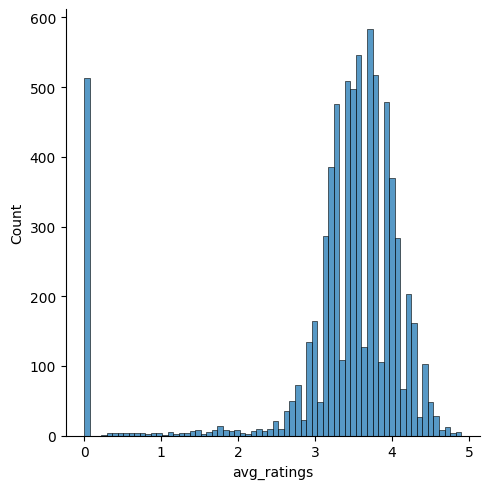

In [23]:
sns.displot(df_rate['avg_ratings'])

### Top restaurant chains in Bengalore

In [24]:
df_rate.shape

(7162, 2)

Text(0.5, 0, 'Number of Restaurants')

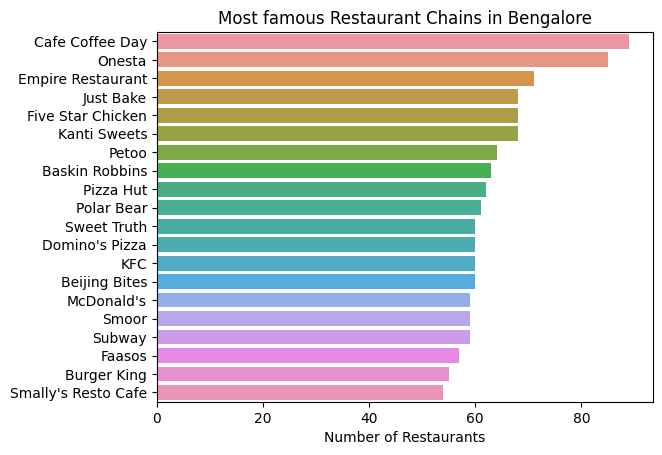

In [25]:
chains = df['name'].value_counts()[0:20]
sns.barplot(x = chains, y = chains.index)
plt.title('Most famous Restaurant Chains in Bengalore')
plt.xlabel('Number of Restaurants')

### How many accept online orders?

In [26]:
x = df['online_order'].value_counts()
labels = ['Accept online orders', "Don't accept online orders"]
px.pie(df, values = x, labels = labels, names = labels, title = 'Online Order Availability')

# Analysis of the most famous restaurants

In [27]:
x = df['book_table'].value_counts()

In [28]:
labels = ['not book', 'book']

In [29]:
import plotly.graph_objs as go
from plotly.offline import iplot

In [30]:
trace = go.Pie(labels = labels, values = x, hoverinfo = 'label + percent', textinfo = 'value')
iplot([trace])

In [31]:
df['rest_type'].isna().sum()

151

In [32]:
df['rest_type'].dropna(inplace = True)

In [33]:
df['rest_type'].isna().sum()

151

In [34]:
len(df['rest_type'].unique())

88

In [35]:
trace1 = go.Bar(x = df['rest_type'].value_counts().nlargest(20).index, y = df['rest_type'].value_counts().nlargest(20))

In [36]:
iplot([trace1])

<AxesSubplot: xlabel='name'>

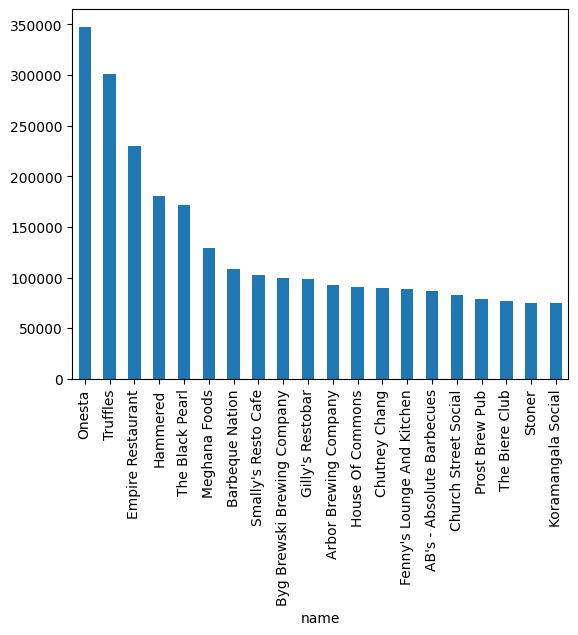

In [37]:
df.groupby('name')['votes'].sum().nlargest(20).plot.bar()

In [38]:
trace1 = go.Bar(x = df.groupby('name')['votes'].sum().nlargest(20).index, y = df.groupby('name')['votes'].sum().nlargest(20))
iplot([trace1])

In [39]:
restaurant = []
location = []
for key, location_df in df.groupby('location'):
    location.append(key)
    restaurant.append(len(location_df['name'].unique()))

In [40]:
df_total = pd.DataFrame(zip(location, restaurant))
df_total.columns = ['location', 'restaurants']
df_total.head()

,location,restaurants
0,BTM,581
1,Banashankari,238
2,Banaswadi,151
3,Bannerghatta Road,362
4,Basavanagudi,195


In [41]:
df_total.set_index('location', inplace = True)
df_total.head()

,restaurants
location,
BTM,581
Banashankari,238
Banaswadi,151
Bannerghatta Road,362
Basavanagudi,195


<AxesSubplot: xlabel='location'>

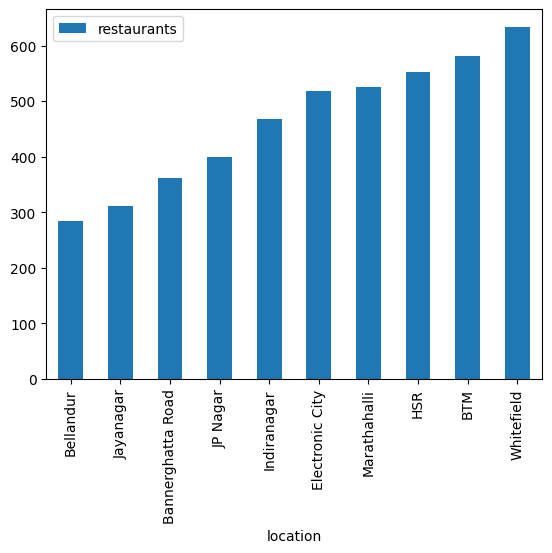

In [42]:
df_total.sort_values(by='restaurants').tail(10).plot.bar()

# Analysis of prices of restaurants

In [43]:
cuisines = df['cuisines'].value_counts()[0:10]
cuisines

North Indian                           2294
North Indian, Chinese                  2060
South Indian                           1320
Cafe                                    653
Bakery, Desserts                        644
Biryani                                 641
South Indian, North Indian, Chinese     601
Fast Food                               580
Desserts                                572
Chinese                                 449
Name: cuisines, dtype: int64

In [44]:
trace1 = go.Bar(x = df['cuisines'].value_counts()[0:10].index, y = df['cuisines'].value_counts()[0:10])

In [45]:
iplot([trace1])

In [46]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [47]:
df['approx_cost(for two people)'].isna().sum()

252

In [48]:
df.dropna(axis= 'index', subset = ['approx_cost(for two people)'], inplace = True)

In [49]:
df['approx_cost(for two people)'].isna().sum()

0

In [50]:
df['approx_cost(for two people)'].dtype

dtype('O')

In [51]:
df['approx_cost(for two people)'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '1,700', '1,400', '1,350', '2,200', '2,000',
       '1,800', '1,900', '180', '330', '2,500', '2,100', '3,000', '2,800',
       '3,400', '50', '40', '1,250', '3,500', '4,000', '2,400', '2,600',
       '1,450', '70', '3,200', '560', '240', '360', '6,000', '1,050',
       '2,300', '4,100', '120', '5,000', '3,700', '1,650', '2,700',
       '4,500'], dtype=object)

In [52]:
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].apply(lambda x: x.replace(',', ''))

In [53]:
df['approx_cost(for two people)'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1200', '350', '250',
       '950', '1000', '1500', '1300', '199', '80', '1100', '160', '1600',
       '230', '130', '1700', '1400', '1350', '2200', '2000', '1800',
       '1900', '180', '330', '2500', '2100', '3000', '2800', '3400', '50',
       '40', '1250', '3500', '4000', '2400', '2600', '1450', '70', '3200',
       '560', '240', '360', '6000', '1050', '2300', '4100', '120', '5000',
       '3700', '1650', '2700', '4500'], dtype=object)

In [54]:
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].astype(int)

In [55]:
df['approx_cost(for two people)'].dtype

dtype('int32')

C:\Users\castr\AppData\Local\Temp\ipykernel_8584\1703931040.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<AxesSubplot: xlabel='approx_cost(for two people)', ylabel='Density'>

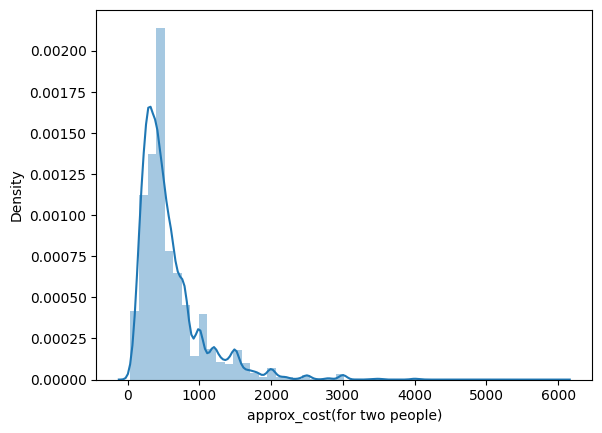

In [56]:
sns.distplot(df['approx_cost(for two people)'])

<AxesSubplot: xlabel='rate', ylabel='approx_cost(for two people)'>

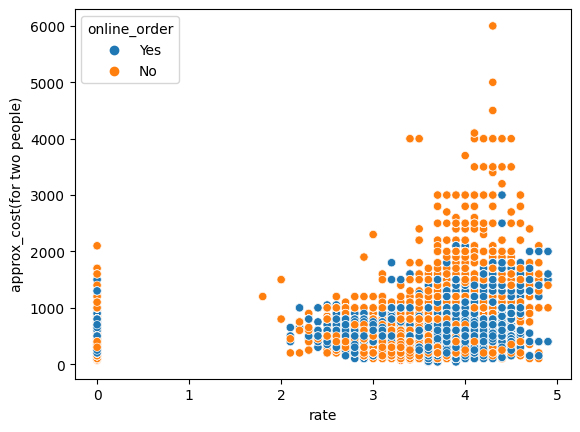

In [57]:
sns.scatterplot(x = 'rate', y = 'approx_cost(for two people)', hue = 'online_order', data = df)

<AxesSubplot: xlabel='online_order', ylabel='votes'>

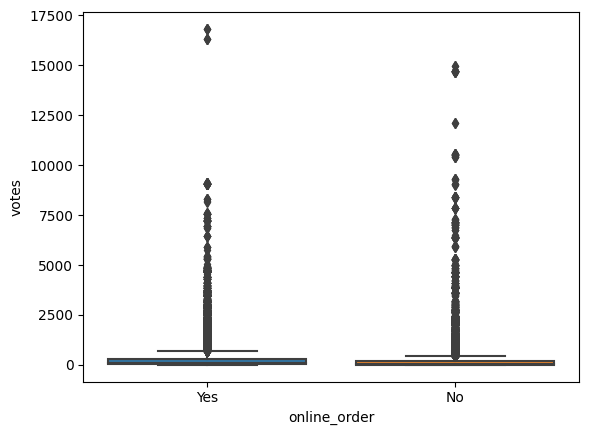

In [58]:
sns.boxplot(x = 'online_order', y = 'votes', data = df)

In [59]:
px.box(df, x = 'online_order', y = 'votes')

In [60]:
px.box(df, x = 'online_order', y = 'approx_cost(for two people)')

# Analysis of restaurant patterns

### Most luxurious Restaurant

In [61]:
df['approx_cost(for two people)'].min()

40

In [62]:
df['approx_cost(for two people)'].max()

6000

In [63]:
df[df['approx_cost(for two people)'] == 6000]['name']

19139    Le Cirque Signature - The Leela Palace
45618    Le Cirque Signature - The Leela Palace
Name: name, dtype: object

### Top 10 most expensive restaurants (Approximated cost for two people)

In [64]:
data = df.copy()

In [65]:
data.set_index('name', inplace = True)

In [66]:
data.head()

,url,address,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
name,,,,,,,,,,,,,,,,
Jalsa,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
Spice Elephant,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
San Churro Cafe,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
Addhuri Udupi Bhojana,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
Grand Village,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",No,No,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [67]:
data['approx_cost(for two people)'].nlargest(10)

name
Le Cirque Signature - The Leela Palace    6000
Le Cirque Signature - The Leela Palace    6000
Royal Afghan - ITC Windsor                5000
Malties - Radisson Blu                    4500
Malties - Radisson Blu                    4500
La Brasserie - Le Meridien                4100
La Brasserie - Le Meridien                4100
La Brasserie - Le Meridien                4100
La Brasserie - Le Meridien                4100
Alba - JW Marriott Bengaluru              4000
Name: approx_cost(for two people), dtype: int32

<AxesSubplot: xlabel='name'>

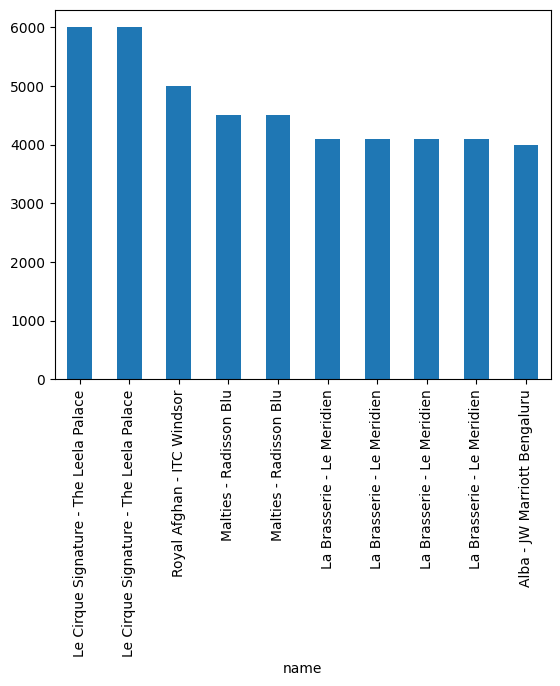

In [68]:
data['approx_cost(for two people)'].nlargest(10).plot.bar()

### Top 10 most cheapest restaurants (Approximated cost for two people)

In [69]:
data['approx_cost(for two people)'].nsmallest(10)

name
Srinidhi Sagar Food Line    40
Srinidhi Sagar Food Line    40
Srinidhi Sagar Food Line    40
Srinidhi Sagar              40
Srinidhi Sagar Food Line    40
Srinidhi Sagar Deluxe       40
Srinidhi Sagar Deluxe       40
Srinidhi Sagar              40
Savera Cafe                 50
Savera Cafe                 50
Name: approx_cost(for two people), dtype: int32

<AxesSubplot: xlabel='name'>

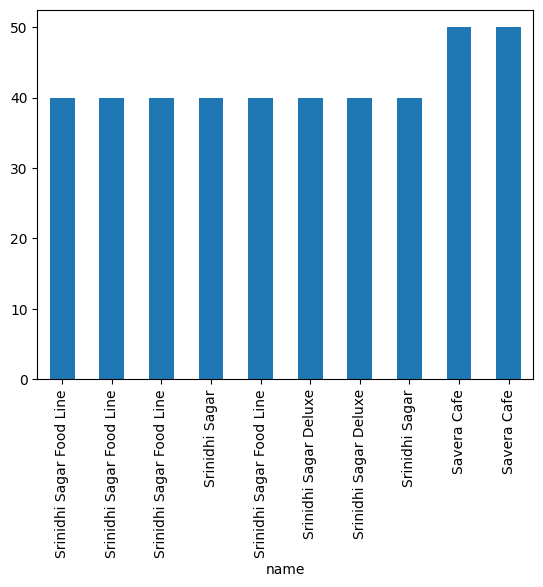

In [70]:
data['approx_cost(for two people)'].nsmallest(10).plot.bar()

In [71]:
data[data['approx_cost(for two people)'] <= 500]

,url,address,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
name,,,,,,,,,,,,,,,,
Addhuri Udupi Bhojana,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
CafÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ© Down The Alley,https://www.zomato.com/bangalore/caf%C3%A9-dow...,"12,29 Near PES University Back Gate, D'Souza N...",Yes,No,4.1,402,080 26724489\r\n+91 7406048982,Banashankari,Cafe,"Waffles, Pasta, Crispy Chicken, Honey Chilli C...",Cafe,500,"[('Rated 4.0', 'RATED\n We ended up here on a...",[],Cafes,Banashankari
The Coffee Shack,https://www.zomato.com/bangalore/the-coffee-sh...,"6th Block, 3rd Stage, Banashankari, Bangalore",Yes,Yes,4.2,164,+91 9731644212,Banashankari,Cafe,"Coffee, Spaghetti, Pancakes, Nachos, Pasta, Sa...","Cafe, Chinese, Continental, Italian",500,"[('Rated 4.0', ""RATED\n Food - 4/5\nAmbience ...",[],Cafes,Banashankari
Caf-Eleven,https://www.zomato.com/bangalore/caf-eleven-ba...,"111, Sapphire Toys Building, 100 Feet Ring Roa...",No,No,4.0,424,080 49577715,Banashankari,Cafe,"Sandwich, Omelette, Ice Tea, Virgin Mojito, Ho...","Cafe, Continental",450,"[('Rated 2.0', ""RATED\n This is a hookah cafe...",[],Cafes,Banashankari
T3H Cafe,https://www.zomato.com/bangalore/t3h-cafe-bana...,"504, CJ Venkata Das Road, Padmanabhangar, 2nd ...",No,No,3.9,93,+91 8884726600,Banashankari,Cafe,"Cheese Maggi, Peri Peri Fries, Pasta Arrabiata","Cafe, Italian, American",300,"[('Rated 4.0', ""RATED\n Happy to see such a c...",[],Cafes,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venice Kerala Restaurant,https://www.zomato.com/bangalore/venice-kerala...,"Opposite Brookfield Mall, Shiva Temple Road, B...",No,No,3.7,34,+91 8880059495,Brookefield,Quick Bites,NaN,Kerala,200,"[('Rated 5.0', 'RATED\n Loved this restaurant...",[],Dine-out,Whitefield
Thai & Chinese Fast Food,https://www.zomato.com/bangalore/thai-chinese-...,"7, Anurhh Arcade, Hoodi Road, Kodigehalli Road...",No,No,3.4,7,+91 9206260085\n+91 7619416923,KR Puram,Quick Bites,NaN,"Chinese, Thai",400,"[('Rated 5.0', 'RATED\n Its Looking delicious...",[],Dine-out,Whitefield
The Crunch,https://www.zomato.com/bangalore/the-crunch-br...,"33/1, Kundalahalli Road, Brookefield, Bangalore",No,No,3.3,6,+91 9016277963,Brookefield,Beverage Shop,NaN,Beverages,300,"[('Rated 3.0', 'RATED\n the sandwich was not ...",[],Dine-out,Whitefield


In [72]:
df_budget = data[data['approx_cost(for two people)'] <= 500].loc[:,('approx_cost(for two people)')]
df_budget = df_budget.reset_index()
df_budget.head()

,name,approx_cost(for two people)
0,Addhuri Udupi Bhojana,300
1,CafÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ© Down The A...,500
2,The Coffee Shack,500
3,Caf-Eleven,450
4,T3H Cafe,300


# Spatial Analysis

### Budget restaurants with good ratings

In [73]:
df[(df['rate'] > 4) & (df['approx_cost(for two people)'] <= 500)].shape

(2436, 17)

In [74]:
len(df[(df['rate'] > 4) & (df['approx_cost(for two people)'] <= 500)]['name'].unique())

372

In [75]:
df_new = df[(df['rate'] > 4) & (df['approx_cost(for two people)'] <= 500)]
df_new.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
10,https://www.zomato.com/bangalore/caf%C3%A9-dow...,"12,29 Near PES University Back Gate, D'Souza N...",CafÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ© Down The A...,Yes,No,4.1,402,080 26724489\r\n+91 7406048982,Banashankari,Cafe,"Waffles, Pasta, Crispy Chicken, Honey Chilli C...",Cafe,500,"[('Rated 4.0', 'RATED\n We ended up here on a...",[],Cafes,Banashankari
12,https://www.zomato.com/bangalore/the-coffee-sh...,"6th Block, 3rd Stage, Banashankari, Bangalore",The Coffee Shack,Yes,Yes,4.2,164,+91 9731644212,Banashankari,Cafe,"Coffee, Spaghetti, Pancakes, Nachos, Pasta, Sa...","Cafe, Chinese, Continental, Italian",500,"[('Rated 4.0', ""RATED\n Food - 4/5\nAmbience ...",[],Cafes,Banashankari
34,https://www.zomato.com/bangalore/faasos-banash...,"80, BDA Complex, 2nd Stage, Banashankari, Bang...",Faasos,Yes,No,4.2,415,+91 7700020020,Banashankari,Quick Bites,"Rolls, Veggie Wrap, Chocolate Fantasy, Rice Bo...","North Indian, Biryani, Fast Food",500,"[('Rated 3.0', 'RATED\n Not worth for the mon...","['Chole Kulcha Meal', 'Upvas Aloo Paratha With...",Delivery,Banashankari
51,https://www.zomato.com/bangalore/shree-cool-po...,"1514, 4th Cross, 7th Main, RPC layout, 2nd Sta...",Shree Cool Point,Yes,No,4.1,28,+91 9900617124,Vijay Nagar,Quick Bites,NaN,"Fast Food, Street Food, Beverages",150,"[('Rated 5.0', 'RATED\n Who would say no to s...","['Vegetable Sandwich', 'Vegetable Sandwich wit...",Delivery,Banashankari
52,https://www.zomato.com/bangalore/corner-house-...,"808/6-1, 24th A Cross, K.R Road, 2nd Stage, Ba...",Corner House Ice Cream,No,No,4.3,345,080 26713965\r\n+91 9845444155,Banashankari,Dessert Parlor,"Hot Chocolate Fudge, Vanilla Ice Cream, Fudge ...","Ice Cream, Desserts",400,"[('Rated 3.0', ""RATED\n Always a fan of corne...",[],Delivery,Banashankari


### Total affordable restaurants at all locations

In [76]:
location = []
total = []

for loc, location_df in df_new.groupby('location'):
    location.append(loc)
    total.append(len(location_df['name'].unique()))


In [77]:
location_df = pd.DataFrame(zip(location, total))
location_df.head()

,0,1
0,BTM,28
1,Banashankari,16
2,Banaswadi,1
3,Bannerghatta Road,9
4,Basavanagudi,24


In [78]:
location_df.columns = ['location', 'restaurant']
location_df.head()

,location,restaurant
0,BTM,28
1,Banashankari,16
2,Banaswadi,1
3,Bannerghatta Road,9
4,Basavanagudi,24


### Find best budget restaurants at any location

In [79]:
def return_budget_restaurants(location, restaurant):
    budget = df[(df['approx_cost(for two people)'] <= 400) & (df['location'] == location) & (df['rate']> 4) & (df['rest_type'] == restaurant)]
    return (budget['name'].unique())

In [80]:
return_budget_restaurants('BTM', 'Quick Bites')

array(['Swadista Aahar', 'Litti Twist', 'The Shawarma Shop', 'Gorbandh',
       'Yum In My Tum', 'Chaatimes', "Muthashy's", 'Swad Punjab Da',
       "Domino's Pizza", 'Roti Wala', 'Andhra Kitchen'], dtype=object)

### Best foodies locations

<AxesSubplot: xlabel='location'>

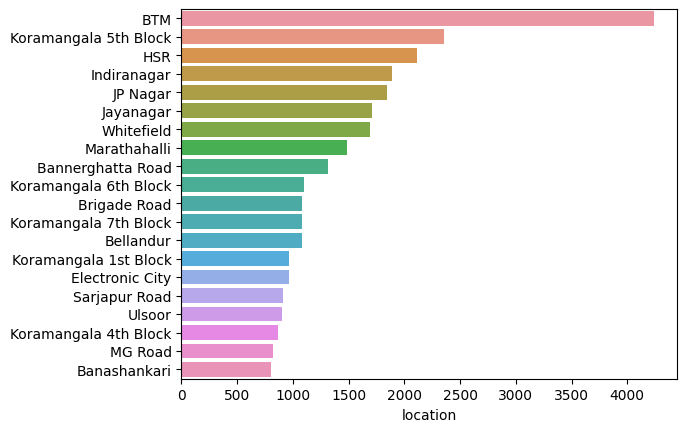

In [81]:
restaurants_location = df['location'].value_counts()[0:20]
sns.barplot(x = restaurants_location, y = restaurants_location.index)

In [82]:
locations = pd.DataFrame({'Name' : df['location'].unique()})
locations['new_Name']='Bangalore '+locations['Name']
locations.head()

,Name,new_Name
0,Banashankari,Bangalore Banashankari
1,Basavanagudi,Bangalore Basavanagudi
2,Mysore Road,Bangalore Mysore Road
3,Jayanagar,Bangalore Jayanagar
4,Kumaraswamy Layout,Bangalore Kumaraswamy Layout


In [83]:
from geopy.geocoders import Nominatim

In [84]:
geolocator = Nominatim(user_agent = 'app')

In [85]:
lat_lon = []
for location in locations['Name']:
    location = geolocator.geocode(location)
    if location is None:
        lat_lon.append(np.nan)
    else:
        geo = (location.latitude, location.longitude)
        lat_lon.append(geo)

In [86]:
locations['geo_loc'] = lat_lon

In [87]:
locations.head()

,Name,new_Name,geo_loc
0,Banashankari,Bangalore Banashankari,"(15.8876779, 75.7046777)"
1,Basavanagudi,Bangalore Basavanagudi,"(12.9417261, 77.5755021)"
2,Mysore Road,Bangalore Mysore Road,"(12.9466619, 77.5300896)"
3,Jayanagar,Bangalore Jayanagar,"(27.64392675, 83.05280519687284)"
4,Kumaraswamy Layout,Bangalore Kumaraswamy Layout,"(12.9081487, 77.5553179)"


In [88]:
locations.shape

(92, 3)

In [89]:
Rest_locations = pd.DataFrame(df['location'].value_counts().reset_index())
Rest_locations.head()

,index,location
0,BTM,4237
1,Koramangala 5th Block,2358
2,HSR,2113
3,Indiranagar,1892
4,JP Nagar,1849


In [90]:
Rest_locations.columns = ['Name', 'count']
Rest_locations.head()

,Name,count
0,BTM,4237
1,Koramangala 5th Block,2358
2,HSR,2113
3,Indiranagar,1892
4,JP Nagar,1849


In [91]:
Rest_locations.shape

(92, 2)

In [92]:
Restaurant_locations = Rest_locations.merge(locations, on = 'Name', how= 'left').dropna()
Restaurant_locations.head()

,Name,count,new_Name,geo_loc
0,BTM,4237,Bangalore BTM,"(45.95485055, -112.49659530324134)"
1,Koramangala 5th Block,2358,Bangalore Koramangala 5th Block,"(12.9348429, 77.6189768)"
2,HSR,2113,Bangalore HSR,"(18.1475, 41.538889)"
3,Indiranagar,1892,Bangalore Indiranagar,"(12.9732913, 77.6404672)"
4,JP Nagar,1849,Bangalore JP Nagar,"(12.2655944, 76.6465404)"


In [93]:
np.array(Restaurant_locations['geo_loc'])

array([(45.95485055, -112.49659530324134), (12.9348429, 77.6189768),
       (18.1475, 41.538889), (12.9732913, 77.6404672),
       (12.2655944, 76.6465404), (27.64392675, 83.05280519687284),
       (53.5533682, -2.2969019), (12.9552572, 77.6984163),
       (12.9521804, 77.6041899), (12.9390255, 77.6238477),
       (50.7955875, -120.3174574), (12.9364846, 77.6134783),
       (12.93103185, 77.6782471), (12.9277245, 77.6327822),
       (12.848759900000001, 77.64825295827616), (12.920441, 77.6653284),
       (12.9778793, 77.6246697), (12.9327778, 77.6294052),
       (12.9755264, 77.6067902), (15.8876779, 75.7046777),
       (13.0221416, 77.6403368), (13.0027353, 77.5703253),
       (12.9417261, 77.5755021), (40.5759032, -74.1252963),
       (-28.9037298, 31.4565195), (33.5935063, -79.0345627),
       (12.996845, 77.6130165), (40.7159493, -74.0071466),
       (13.0093455, 77.6377094), (13.0268145, 77.5717187),
       (40.7652844, -76.373824), (13.0141618, 77.6518539),
       (12.9882338, 77

In [94]:
lat, lon = zip (*np.array(Restaurant_locations['geo_loc']))

In [95]:
type(lat)

tuple

In [96]:
Restaurant_locations['lat'] = lat
Restaurant_locations['lon'] = lon

In [97]:
Restaurant_locations.head()

,Name,count,new_Name,geo_loc,lat,lon
0,BTM,4237,Bangalore BTM,"(45.95485055, -112.49659530324134)",45.954851,-112.496595
1,Koramangala 5th Block,2358,Bangalore Koramangala 5th Block,"(12.9348429, 77.6189768)",12.934843,77.618977
2,HSR,2113,Bangalore HSR,"(18.1475, 41.538889)",18.147500,41.538889
3,Indiranagar,1892,Bangalore Indiranagar,"(12.9732913, 77.6404672)",12.973291,77.640467
4,JP Nagar,1849,Bangalore JP Nagar,"(12.2655944, 76.6465404)",12.265594,76.646540


In [98]:
Restaurant_locations.drop('geo_loc', axis = 1, inplace = True)

In [99]:
Restaurant_locations.head()

,Name,count,new_Name,lat,lon
0,BTM,4237,Bangalore BTM,45.954851,-112.496595
1,Koramangala 5th Block,2358,Bangalore Koramangala 5th Block,12.934843,77.618977
2,HSR,2113,Bangalore HSR,18.147500,41.538889
3,Indiranagar,1892,Bangalore Indiranagar,12.973291,77.640467
4,JP Nagar,1849,Bangalore JP Nagar,12.265594,76.646540


In [100]:
import folium
from folium.plugins import HeatMap

In [101]:
def generatebasemap(default_location = [12.97, 77.59], default_zoom_start = 12):
    basemap = folium.Map(location = default_location, zoom_start = default_zoom_start)
    return basemap

In [102]:
basemap = generatebasemap()
basemap

In [103]:
HeatMap(Restaurant_locations[['lat', 'lon', 'count']].values.tolist(), zoom = 20, radius = 15).add_to(basemap)

In [104]:
basemap

In [105]:
df2 = df[df['cuisines'] == 'North Indian']
df2.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
5,https://www.zomato.com/bangalore/timepass-dinn...,"37, 5-1, 4th Floor, Bosco Court, Gandhi Bazaar...",Timepass Dinner,Yes,No,3.8,286,+91 9980040002\r\n+91 9980063005,Basavanagudi,Casual Dining,"Onion Rings, Pasta, Kadhai Paneer, Salads, Sal...",North Indian,600,"[('Rated 3.0', 'RATED\n Food 3/5\nAmbience 3/...",[],Buffet,Banashankari
50,https://www.zomato.com/bangalore/petoo-banasha...,"276, Ground Floor, 100 Feet Outer Ring Road, B...",Petoo,No,No,3.7,21,+91 8026893211,Banashankari,Quick Bites,NaN,North Indian,450,"[('Rated 2.0', 'RATED\n This is a neatly made...",[],Delivery,Banashankari
72,https://www.zomato.com/bangalore/spicy-tandoor...,"Opposite ICICi Bank, Hanuman Nagar, Banashanka...",Spicy Tandoor,No,No,0.0,0,+91 8050884222,Banashankari,Quick Bites,NaN,North Indian,150,"[('Rated 4.0', 'RATED\n cost for chicken roll...",[],Delivery,Banashankari
87,https://www.zomato.com/bangalore/krishna-sagar...,"38, 22nd Main, 22nd Cross, Opposite BDA, 2nd S...",Krishna Sagar,No,No,3.5,31,+91 8892752997\r\n+91 7204780429,Banashankari,Quick Bites,NaN,North Indian,200,"[('Rated 1.0', 'RATED\n Worst experience with...",[],Delivery,Banashankari
94,https://www.zomato.com/bangalore/nandhini-delu...,"304, Opposite Apollo Public School, 100 Feet R...",Nandhini Deluxe,No,No,2.6,283,080 26890011\r\n080 26890033,Banashankari,Casual Dining,"Biryani, Chicken Guntur, Thali, Buttermilk, Ma...",North Indian,600,"[('Rated 3.0', 'RATED\n Ididnt like much.\n\n...",[],Delivery,Banashankari


In [106]:
north_india = df2.groupby(['location'], as_index = False)['url'].agg('count')

In [107]:
north_india.head()

,location,url
0,BTM,262
1,Banashankari,35
2,Banaswadi,9
3,Bannerghatta Road,60
4,Basavanagudi,17


In [108]:
north_india.columns = ['Name', 'count']

In [109]:
north_india.head()

,Name,count
0,BTM,262
1,Banashankari,35
2,Banaswadi,9
3,Bannerghatta Road,60
4,Basavanagudi,17


In [110]:
north_india = north_india.merge(locations, on = 'Name', how = 'left').dropna()
north_india.head(10)

,Name,count,new_Name,geo_loc
0,BTM,262,Bangalore BTM,"(45.95485055, -112.49659530324134)"
1,Banashankari,35,Bangalore Banashankari,"(15.8876779, 75.7046777)"
2,Banaswadi,9,Bangalore Banaswadi,"(13.0141618, 77.6518539)"
3,Bannerghatta Road,60,Bangalore Bannerghatta Road,"(12.9521804, 77.6041899)"
4,Basavanagudi,17,Bangalore Basavanagudi,"(12.9417261, 77.5755021)"
5,Basaveshwara Nagar,1,Bangalore Basaveshwara Nagar,"(12.2950874, 76.6149845)"
6,Bellandur,131,Bangalore Bellandur,"(12.93103185, 77.6782471)"
7,Bommanahalli,6,Bangalore Bommanahalli,"(12.9089453, 77.6239038)"
8,Brigade Road,39,Bangalore Brigade Road,"(50.7955875, -120.3174574)"
9,Brookefield,42,Bangalore Brookefield,"(33.5935063, -79.0345627)"


In [111]:
north_india['lat'], north_india['lon'] = zip(*north_india['geo_loc'].values)

In [112]:
north_india.head()

,Name,count,new_Name,geo_loc,lat,lon
0,BTM,262,Bangalore BTM,"(45.95485055, -112.49659530324134)",45.954851,-112.496595
1,Banashankari,35,Bangalore Banashankari,"(15.8876779, 75.7046777)",15.887678,75.704678
2,Banaswadi,9,Bangalore Banaswadi,"(13.0141618, 77.6518539)",13.014162,77.651854
3,Bannerghatta Road,60,Bangalore Bannerghatta Road,"(12.9521804, 77.6041899)",12.952180,77.604190
4,Basavanagudi,17,Bangalore Basavanagudi,"(12.9417261, 77.5755021)",12.941726,77.575502


In [113]:
north_india.drop('geo_loc', axis = 1, inplace = True)

In [114]:
north_india.head()

,Name,count,new_Name,lat,lon
0,BTM,262,Bangalore BTM,45.954851,-112.496595
1,Banashankari,35,Bangalore Banashankari,15.887678,75.704678
2,Banaswadi,9,Bangalore Banaswadi,13.014162,77.651854
3,Bannerghatta Road,60,Bangalore Bannerghatta Road,12.952180,77.604190
4,Basavanagudi,17,Bangalore Basavanagudi,12.941726,77.575502


In [115]:
basemap = generatebasemap()
HeatMap(north_india[['lat', 'lon', 'count']].values.tolist(), zoom = 20, radius = 15).add_to(basemap)
basemap

In [116]:
df_1 = df.groupby(['rest_type', 'name']).agg('count')
df_1

url  address  online_order  \
rest_type          name                                                      
Bakery             7th Heaven                     2        2             2   
                   A Little For Love              1        1             1   
                   Adarsh Bakery                  2        2             2   
                   Adi's Cake N Cafe              2        2             2   
                   Albert Bakery                  1        1             1   
...                                             ...      ...           ...   
Takeaway, Delivery Yumlane                        2        2             2   
                   Yumme Veg                      2        2             2   
                   Zamorin's Mappillah Biryani    1        1             1   
                   Zu's Doner Kebaps              1        1             1   
                   eat.fit                        2        2             2   

                                                book_table  rate  votes  \
rest_type          name                                                   
Bakery             7th Heaven                            2     2      2   
                   A Little For Love                     1     1      1   
                   Adarsh Bakery                         2     2      2   
                   Adi's Cake N Cafe                     2     2      2   
                   Albert Bakery                         1     1      1   
...                                                    ...   ...    ...   
Takeaway, Delivery Yumlane                               2     2      2   
                   Yumme Veg                             2     2      2   
                   Zamorin's Mappillah Biryani           1     1      1   
                   Zu's Doner Kebaps                     1     1      1   
                   eat.fit                               2     2      2   

                                                phone  location  dish_liked  \
rest_type          name                                                       
Bakery             7th Heaven                       2         2           0   
                   A Little For Love                1         1           0   
                   Adarsh Bakery                    2         2           0   
                   Adi's Cake N Cafe                2         2           0   
                   Albert Bakery                    1         1           1   
...                                               ...       ...         ...   
Takeaway, Delivery Yumlane                          2         2           0   
                   Yumme Veg                        2         2           0   
                   Zamorin's Mappillah Biryani      1         1           0   
                   Zu's Doner Kebaps                0         1           0   
                   eat.fit                          2         2           0   

                                                cuisines  \
rest_type          name                                    
Bakery             7th Heaven                          2   
                   A Little For Love                   1   
                   Adarsh Bakery                       2   
                   Adi's Cake N Cafe                   2   
                   Albert Bakery                       1   
...                                                  ...   
Takeaway, Delivery Yumlane                             2   
                   Yumme Veg                           2   
                   Zamorin's Mappillah Biryani         1   
                   Zu's Doner Kebaps                   1   
                   eat.fit                             2   

                                                approx_cost(for two people)  \
rest_type          name                                                       
Bakery             7th Heaven                                             2   
           

In [117]:
df_1.sort_values(['url'], ascending = False)

url  address  online_order  \
rest_type           name                                              
Cafe                Cafe Coffee Day       89       89            89   
Casual Dining, Cafe Onesta                85       85            85   
Quick Bites         Five Star Chicken     67       67            67   
                    Domino's Pizza        60       60            60   
                    McDonald's            59       59            59   
...                                      ...      ...           ...   
                    New Students Corner    1        1             1   
Dessert Parlor      Mr Gola                1        1             1   
Casual Dining       Parijatha Paradise     1        1             1   
                    Parijatha Fish Land    1        1             1   
Delivery            SaJuSo                 1        1             1   

                                         book_table  rate  votes  phone  \
rest_type           name                                                  
Cafe                Cafe Coffee Day              89    89     89     86   
Casual Dining, Cafe Onesta                       85    85     85     85   
Quick Bites         Five Star Chicken            67    67     67     62   
                    Domino's Pizza               60    60     60     60   
                    McDonald's                   59    59     59     59   
...                                             ...   ...    ...    ...   
                    New Students Corner           1     1      1      1   
Dessert Parlor      Mr Gola                       1     1      1      1   
Casual Dining       Parijatha Paradise            1     1      1      1   
                    Parijatha Fish Land           1     1      1      1   
Delivery            SaJuSo                        1     1      1      1   

                                         location  dish_liked  cuisines  \
rest_type           name                                                  
Cafe                Cafe Coffee Day            89          31        89   
Casual Dining, Cafe Onesta                     85          85        85   
Quick Bites         Five Star Chicken          67          10        67   
                    Domino's Pizza             60          55        60   
                    McDonald's                 59          57        59   
...                                           ...         ...       ...   
                    New Students Corner         1           0         1   
Dessert Parlor      Mr Gola                     1           0         1   
Casual Dining       Parijatha Paradise          1           0         1   
                    Parijatha Fish Land         1           0         1   
Delivery            SaJuSo                      1           0         1   

                                         approx_cost(for two people)  \
rest_type           name                                               
Cafe                Cafe Coffee Day                               89   
Casual Dining, Cafe Onesta                                        85   
Quick Bites         Five Star Chicken                             67   
                    Domino's Pizza                                60   
                    McDonald's                                    59   
...                                                              ...   
                    New Students Corner                            1   
Dessert Parlor      Mr Gola                                        1   
Casual Dining       Parijatha Paradise                             1   
                    Parijatha Fish Land                            1   
Delivery            SaJuSo                                         1   

                                         reviews_list  menu_item  \
rest_type           name                                           
Cafe                Cafe Coffee Day                89         89   
Casual Dining, Cafe Ones

In [118]:
df_1.sort_values(['url'], ascending = False).groupby(['rest_type'], as_index = False).apply(lambda x: x.sort_values(by = 'url', ascending = False))

url  address  online_order  \
   rest_type          name                                                     
0  Bakery             Just Bake                    44       44            44   
                      Warm Oven                    28       28            28   
                      INDULGE by InnerChef         28       28            28   
                      Karachi Bakery               26       26            26   
                      CakeZone                     21       21            21   
...                                               ...      ...           ...   
86 Takeaway, Delivery Agraharam Meal                1        1             1   
                      Adyar Ananda Bhavan Sweets    1        1             1   
                      Faasos                        1        1             1   
                      @North Parontha Hut           1        1             1   
                      Lucky Singh & Co              1        1             1   

                                                  book_table  rate  votes  \
   rest_type          name                                                  
0  Bakery             Just Bake                           44    44     44   
                      Warm Oven                           28    28     28   
                      INDULGE by InnerChef                28    28     28   
                      Karachi Bakery                      26    26     26   
                      CakeZone                            21    21     21   
...                                                      ...   ...    ...   
86 Takeaway, Delivery Agraharam Meal                       1     1      1   
                      Adyar Ananda Bhavan Sweets           1     1      1   
                      Faasos                               1     1      1   
                      @North Parontha Hut                  1     1      1   
                      Lucky Singh & Co                     1     1      1   

                                                  phone  location  dish_liked  \
   rest_type          name                                                      
0  Bakery             Just Bake                      44        44          14   
                      Warm Oven                      28        28           7   
                      INDULGE by InnerChef           28        28           0   
                      Karachi Bakery                 24        26           3   
                      CakeZone                       21        21          10   
...                                                 ...       ...         ...   
86 Takeaway, Delivery Agraharam Meal                  1         1           1   
                      Adyar Ananda Bhavan Sweets      1         1           0   
                      Faasos                          1         1           1   
                      @North Parontha Hut             1         1           0   
                      Lucky Singh & Co                1         1           1   

                                                  cuisines  \
   rest_type          name                                   
0  Bakery             Just Bake                         44   
                      Warm Oven                         28   
                      INDULGE by InnerChef              28   
                      Karachi Bakery                    26   
                      CakeZone                          21   
...                                                    ...   
86 Takeaway, Delivery Agraharam Meal                     1   
                      Adyar Ananda Bhavan Sweets         1   
                      Faasos                             1   
                      @North Parontha Hut                1   
                      Lucky Singh & Co                   1   

                                                  approx_cost(for two people)  \
   rest_type          name                                       

In [119]:
df_1.sort_values(['url'], ascending = False).groupby(['rest_type'], as_index = False).apply(lambda x: x.sort_values(by = 'url', ascending = False))['url'].reset_index()

,level_0,rest_type,name,url
0,0,Bakery,Just Bake,44
1,0,Bakery,Warm Oven,28
2,0,Bakery,INDULGE by InnerChef,28
3,0,Bakery,Karachi Bakery,26
4,0,Bakery,CakeZone,21
...,...,...,...,...
7707,86,"Takeaway, Delivery",Agraharam Meal,1
7708,86,"Takeaway, Delivery",Adyar Ananda Bhavan Sweets,1
7709,86,"Takeaway, Delivery",Faasos,1
7710,86,"Takeaway, Delivery",@North Parontha Hut,1


In [120]:
dataset = df_1.sort_values(['url'], ascending = False).groupby(['rest_type'], as_index = False).apply(lambda x: x.sort_values(by = 'url', ascending = False))['url'].reset_index().rename(columns = {'url':'count'})
dataset

,level_0,rest_type,name,count
0,0,Bakery,Just Bake,44
1,0,Bakery,Warm Oven,28
2,0,Bakery,INDULGE by InnerChef,28
3,0,Bakery,Karachi Bakery,26
4,0,Bakery,CakeZone,21
...,...,...,...,...
7707,86,"Takeaway, Delivery",Agraharam Meal,1
7708,86,"Takeaway, Delivery",Adyar Ananda Bhavan Sweets,1
7709,86,"Takeaway, Delivery",Faasos,1
7710,86,"Takeaway, Delivery",@North Parontha Hut,1


In [121]:
casual = dataset[dataset['rest_type'] == 'Casual Dining']
casual

,level_0,rest_type,name,count
1001,24,Casual Dining,Empire Restaurant,58
1002,24,Casual Dining,Beijing Bites,48
1003,24,Casual Dining,Mani's Dum Biryani,47
1004,24,Casual Dining,Chung Wah,46
1005,24,Casual Dining,Oye Amritsar,41
...,...,...,...,...
2635,24,Casual Dining,Uppercut - Sheraton Grand Bengaluru Whitefield...,1
2636,24,Casual Dining,Utsav Restaurant,1
2637,24,Casual Dining,VMS Star Biriyani,1
2638,24,Casual Dining,Veruthe Oru Thattukada,1
